In [81]:
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from wremnants import boostHistHelpers as hh
from wremnants import plot_tools,syst_tools,theory_tools
from wremnants import histselections as sel
import lz4.frame
import pickle
import numpy as np
import hist
import uproot

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
with lz4.frame.open("../w_z_gen_dists.pkl.lz4") as f:
    out = pickle.load(f)

In [7]:
out.keys()

dict_keys(['WplusmunuPostVFP', 'ZmumuPostVFP'])

In [9]:
out['WplusmunuPostVFP']["dataset"]["xsec"]

11572.19

In [10]:
histInfo = out['WplusmunuPostVFP']["output"]

In [33]:
hnnpdf = histInfo["pdfNNPDF31"]
hnnpdfUp, hnnpdfDown = theory_tools.hessianPdfUnc(hnnpdf, "tensor_axis_0", True)
hists = [x.project("ptVgen") for x in [hnnpdf[...,0], hnnpdf[...,1], hnnpdf[...,2]]]

In [76]:
diff = hh.addHists(hnnpdf, -1*hnnpdf[{"tensor_axis_0" : 0}])

In [77]:
shiftUp, shiftDown = theory_tools.pdfSymmetricShifts(diff, "tensor_axis_0")

In [78]:
hnnpdfUp, hnnpdfDown = theory_tools.hessianPdfUnc(hnnpdf)

In [87]:
combinef = uproot.open("../combineResults/Wmass/qcdScaleByHelicityPt/pdfNNPDF31/WMassCombineInput.root")

In [88]:
pdfs = [combinef[f"x_Wmunu_pdf{i}NNPDF31Up_plus"].to_hist() for i in range(1,101)]

In [90]:
nominal_hist = combinef["x_Wmunu_plus"].to_hist()

In [165]:
pdf_axis = hist.axis.Integer(0, 101, name="pdfIdx", flow=False)

In [166]:
pdf_hist_pre = hist.Hist(*nominal_hist.axes, pdf_axis, name="pdf")
pdf_hist_pre[...,0] = nominal_hist.values(flow=False)
pdf_hist_pre[...,1:] = np.stack([x.values() for x in pdfs], axis=-1)

In [167]:
hnnpdfUp.sum()/nominal_hist.sum().value

2.414242812114435

In [170]:
diff = hh.addHists(pdf_hist_pre, -1*pdf_hist_pre[{"pdfIdx" : 0}])

In [152]:
pdf_hist_pre[...,0].values(flow=False).sum()

55071326.27459676

In [169]:
diff.values(flow=True).sum()

289509.19305140985

In [164]:
pdf_hist_pre.view(flow=True).shape

(50, 31, 103)

In [140]:
sq = hh.multiplyHists(diff, diff)

Here
-109853143.35614213 -109853143.35614213
-109853143.35614213 -109853143.35614213 -109853143.35614213 -109853143.35614213
-109853143.35614213 -109853143.35614213


In [133]:
sq[...,2].sum()

WeightedSum(value=6.04621e+06, variance=0)

In [122]:
shiftUp, shiftDown = theory_tools.pdfSymmetricShifts(diff, "pdfIdx")

In [124]:
shiftUp.sum()

WeightedSum(value=7.78842e+07, variance=0)

In [125]:
nominal_hist.sum()

WeightedSum(value=5.50713e+07, variance=3.86246e+07)

In [171]:
hnnpdfUp, hnnpdfDown = theory_tools.hessianPdfUnc(pdf_hist_pre, "pdfIdx")

Here
289509.19305140985 289509.19305140985
289509.19305140985 289509.19305140985 289509.19305140985 289509.19305140985
289509.19305140985 289509.19305140985
Here
55071326.27459675 496034.0578893483
Here
55071326.27459675 -496034.0578893483


In [174]:
#hists = [x.project("ptVgen") for x in [hnnpdf[...,0], hnnpdfUp, hnnpdfDown]]
#hists = [x.project("yaxis") for x in [pdf_hist_pre[...,0], hnnpdfUp, hnnpdfDown]]
hists = [x.project("yaxis") for x in [pdf_hist_pre[...,0], hnnpdfUp, hnnpdfDown]]

Here
55071326.27459677 55071326.27459677
Here
55567360.33248611 55071326.27459677
Here
54575292.2167074 55071326.27459677


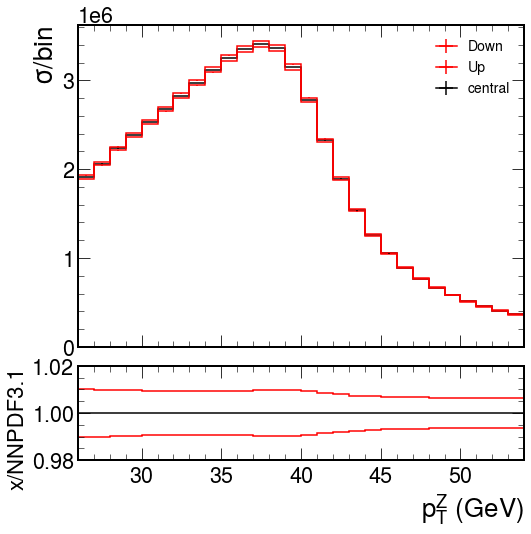

In [175]:
fig = plot_tools.makePlotWithRatioToRef(hists, colors=["black", "red", "red"], labels=["central", "Up", "Down"], rrange=[0.98, 1.02], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{Z}}$ (GeV)", rlabel="x/NNPDF3.1", binwnorm=1.0, nlegcols=1)


In [101]:
hct18 = histInfo["Wmunu"]["pdfCT18"]
hct18Up, hct18Down = theory_tools.hessianPdfUnc(hct18, "tensor_axis_0", False, scale=1/1.67)

In [103]:
hmmht = histInfo["Wmunu"]["pdfMMHT"]
hmmhtUp, hmmhtDown = theory_tools.hessianPdfUnc(hmmht, "tensor_axis_0", False)

In [99]:
hists = [x.project("ptVgen") for x in [hnnpdf[...,0], hnnpdfUp, hnnpdfDown, hct18[...,0], hct18Up, hct18Down, hmmht[...,0], hmmhtUp, hmmhtDown]]
names = ["NNPDF31", "NNPDF31 $\pm1\sigma$", "", "CT18", "CT18 $\pm1\sigma$", "", "MMHT", "MMHT $\pm1\sigma$", ""]
colors = ["black", "gray", "gray", "blue", "lightblue", "lightblue", "green", "lightgreen", "lightgreen"]

In [161]:
hnnpdf40 = newhists["pdfNNPDF40"]
hnnpdf40Cen = hnnpdf40[...,0]
hnnpdf31Cen = hnnpdf[...,0]
hnnpdf40Up, hnnpdf40Down = theory_tools.hessianPdfUnc(hnnpdf40, "tensor_axis_0", True)

In [164]:
hnnpdf4lhc = newhists["pdfPDF4LHC21"]
hnnpdf4lhcCen = hnnpdf4lhc[...,0]
hnnpdf4lhcUp, hnnpdf4lhcDown = theory_tools.hessianPdfUnc(hnnpdf4lhc, "tensor_axis_0", True)

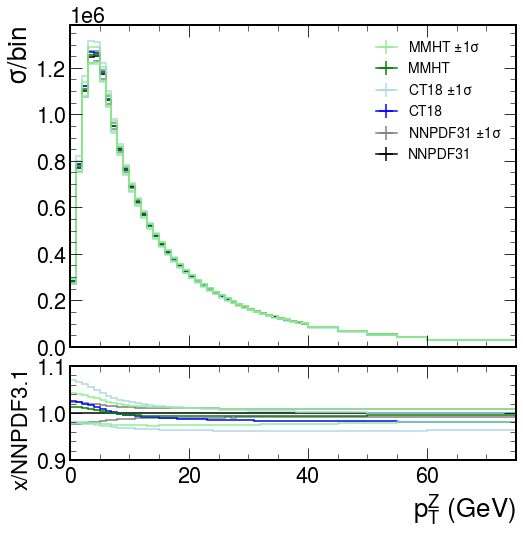

In [100]:
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=names, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{Z}}$ (GeV)", rlabel="x/NNPDF3.1", binwnorm=1.0, nlegcols=1)

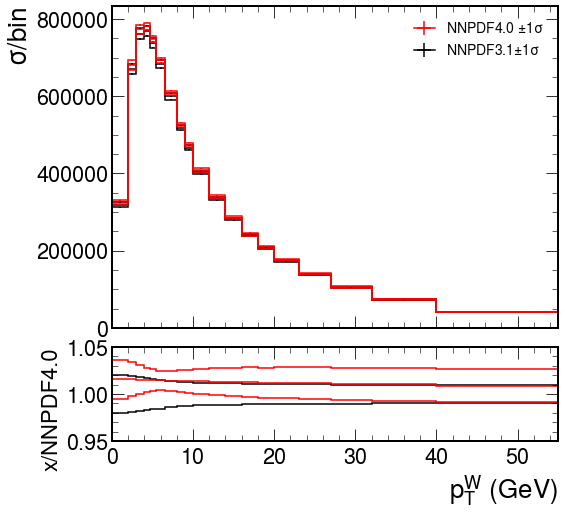

In [150]:
hists = [x.project("ptVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf40Cen, hnnpdf40Up, hnnpdf40Down, ]]
names = ["NNPDF3.1$\pm1\sigma$", "", "", "NNPDF4.0 $\pm1\sigma$", "", "", ]
colors = ["black", "black", "black", "red", "red", "red"]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=names, rrange=[0.95, 1.05], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{W}}$ (GeV)", rlabel="x/NNPDF4.0", binwnorm=1.0, nlegcols=1)

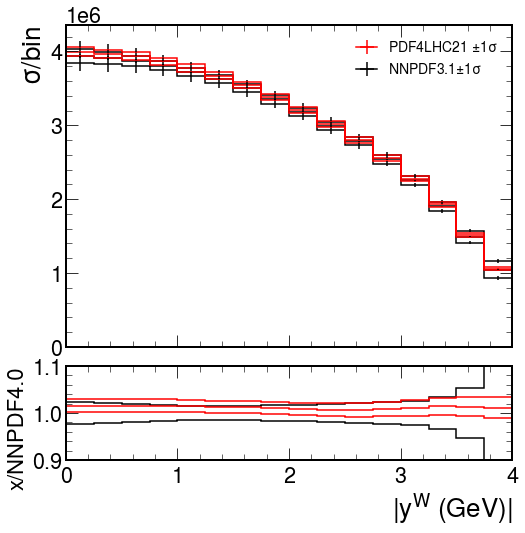

In [165]:
yhists = [x.project("absYVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf40Cen, hnnpdf40Up, hnnpdf40Down, ]]
fig = plot_tools.makePlotWithRatioToRef(yhists, colors=colors, labels=names, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="$|\mathrm{y}^{\mathrm{W}}$ (GeV)|", rlabel="x/NNPDF4.0", binwnorm=1.0, nlegcols=1)


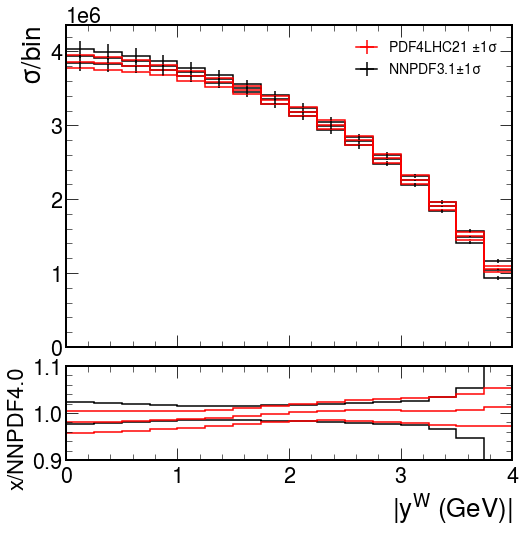

In [166]:
names = ["NNPDF3.1$\pm1\sigma$", "", "", "PDF4LHC21 $\pm1\sigma$", "", "", ]
colors = ["black", "black", "black", "red", "red", "red"]
yhists = [x.project("absYVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf4lhcCen, hnnpdf4lhcUp, hnnpdf4lhcDown, ]]
fig = plot_tools.makePlotWithRatioToRef(yhists, colors=colors, labels=names, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="$|\mathrm{y}^{\mathrm{W}}$ (GeV)|", rlabel="x/NNPDF4.0", binwnorm=1.0, nlegcols=1)

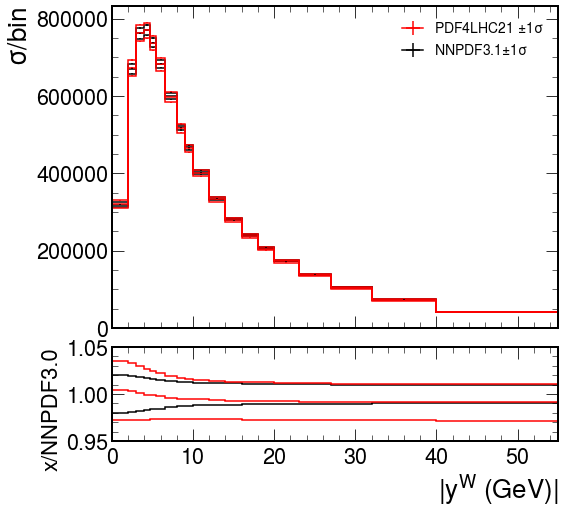

In [156]:
yhists = [x.project("ptVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf4lhcCen, hnnpdf4lhcUp, hnnpdf4lhcDown, ]]
fig = plot_tools.makePlotWithRatioToRef(yhists, colors=colors, labels=names, rrange=[0.95, 1.05], ylabel="$\sigma$/bin", xlabel="$|\mathrm{y}^{\mathrm{W}}$ (GeV)|", rlabel="x/NNPDF3.0", binwnorm=1.0, nlegcols=1)


In [157]:
hnnpdf4lhcUp.project("absYVgen").sum().value/hnnpdf4lhcCen.project("absYVgen").sum().value

1.0681840236807116

In [185]:
out.keys()

dict_keys(['WplusmunuPostVFP', 'WminusmunuPostVFP', 'WplustaunuPostVFP', 'WminustaunuPostVFP', 'Wminusmunu_bugfix', 'Wminusmunu_bugfix_newprod', 'Wplusmunu_bugfix', 'Wplusmunu_bugfix_reweight_h2'])

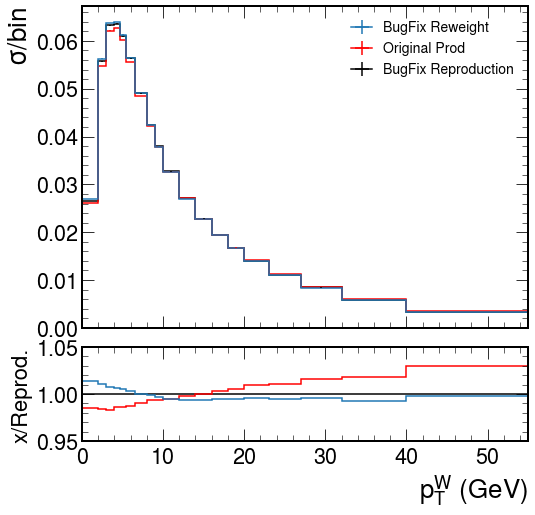

In [195]:
hists = [out[x]["output"]["nominal_gen"].project("ptVgen")/out[x]["weight_sum"] for x in ['Wplusmunu_bugfix', 'WplusmunuPostVFP', 'Wplusmunu_bugfix_reweight_h2']]
names = ["BugFix Reproduction", "Original Prod", "BugFix Reweight"]
colors = ["black", "red"]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=names, rrange=[0.95, 1.05], ylabel="$\sigma$/bin", xlabel="p$_{\mathrm{T}}^{\mathrm{W}}$ (GeV)", rlabel="x/Reprod.", binwnorm=1.0, nlegcols=1)

#len(colors)

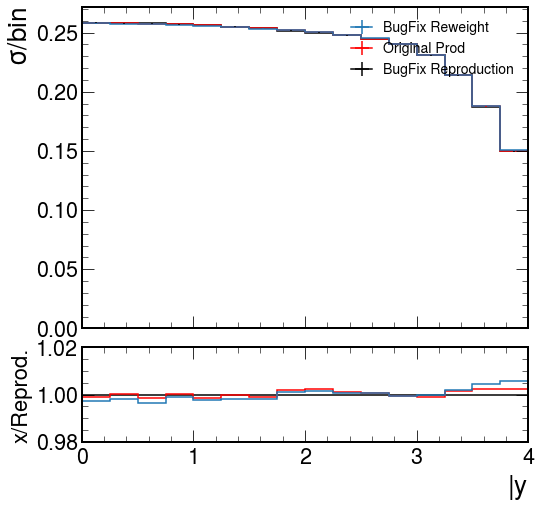

In [193]:
hists = [out[x]["output"]["nominal_gen"].project("absYVgen")/out[x]["weight_sum"] for x in ['Wplusmunu_bugfix', 'WplusmunuPostVFP', 'Wplusmunu_bugfix_reweight_h2']]
names = ["BugFix Reproduction", "Original Prod", "BugFix Reweight"]
colors = ["black", "red"]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, ymax=None, labels=names, rrange=[0.98, 1.02], ylabel="$\sigma$/bin", xlabel="$|\mathrm{y}}^{\mathrm{W}}|$", rlabel="x/Reprod.", binwnorm=1.0, nlegcols=1)

#len(colors)